In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('data_cleaned.csv')

In [13]:
data

,Unnamed: 0,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,nwspol,pplfair,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,1,50030,21.0,0.0,2.0,7.0,9.0,AT,90.0,0.0,...,2.0,2.0,6.0,6.0,4.0,1.0,1.0,2.0,7.0,10.0
1,2,50057,53.0,8.0,2.0,4.0,9.0,AT,30.0,9.0,...,4.0,3.0,7.0,5.0,8.0,4.0,1.0,6.0,6.0,5.0
2,3,50106,78.0,6.0,3.0,6.0,7.0,AT,15.0,6.0,...,2.0,3.0,5.0,6.0,9.0,3.0,2.0,4.0,6.0,5.0
3,4,50145,64.0,1.0,2.0,5.0,9.0,AT,60.0,3.0,...,1.0,3.0,6.0,8.0,8.0,5.0,1.0,6.0,8.0,9.0
4,5,50158,59.0,3.0,2.0,6.0,8.0,AT,120.0,8.0,...,3.0,3.0,3.0,5.0,7.0,5.0,1.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12237,16631,68019,54.0,7.0,3.0,4.0,7.0,GR,90.0,2.0,...,2.0,2.0,2.0,7.0,7.0,3.0,1.0,3.0,4.0,5.0
12238,16632,68032,61.0,1.0,4.0,2.0,3.0,GR,0.0,7.0,...,2.0,2.0,0.0,3.0,5.0,0.0,2.0,2.0,1.0,0.0
12239,16634,68051,46.0,9.0,4.0,6.0,8.0,GR,90.0,7.0,...,2.0,3.0,3.0,8.0,9.0,3.0,1.0,4.0,5.0,3.0
12240,16637,68067,65.0,7.0,3.0,5.0,6.0,GR,60.0,5.0,...,2.0,1.0,3.0,9.0,9.0,0.0,1.0,0.0,0.0,2.0


Гипотеза 1: Чувство дохода семьи влияет на уровень счастья
--------------------------------------------------------

Описательные статистики по группам:
         mean   std  count
hincfel                   
1.0      8.18  1.32   5067
2.0      7.67  1.52   5349
3.0      7.03  1.83   1516
4.0      6.52  2.16    282


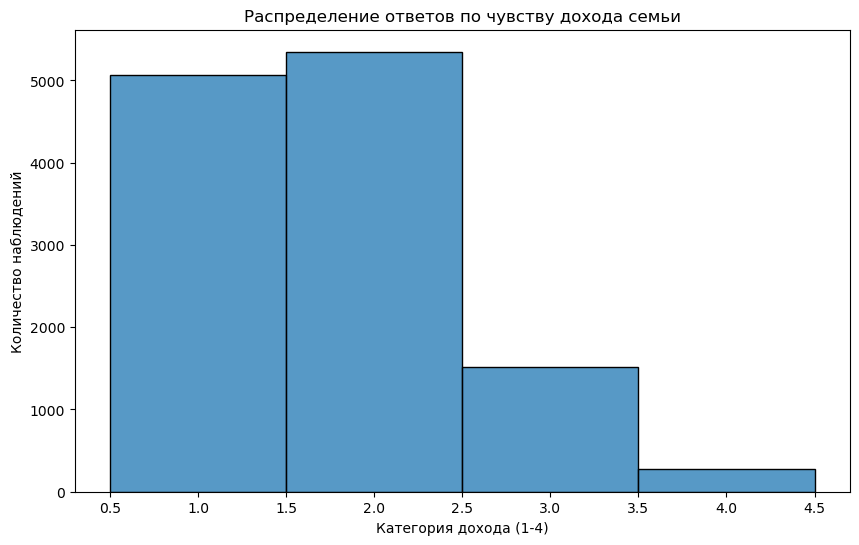


Корреляция Спирмена: -0.257
p-value: 0.0000
Корреляция статистически значима (p < 0.05)


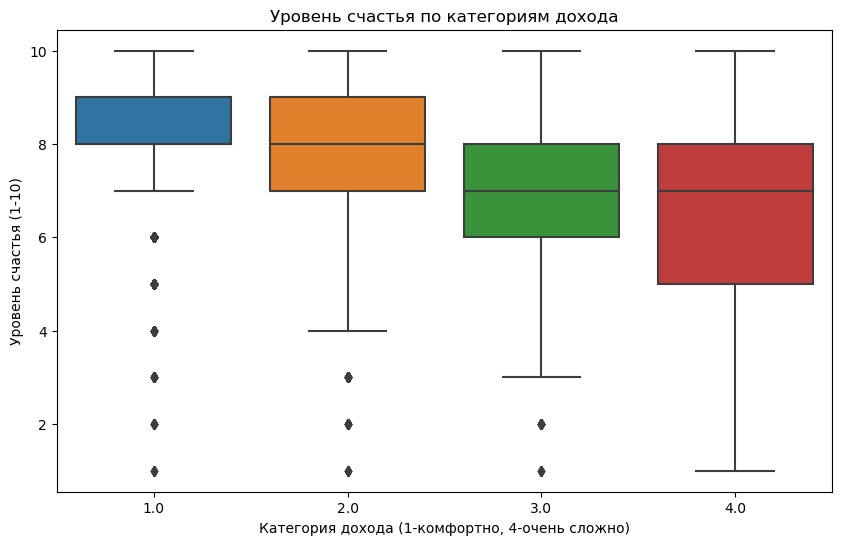


Гипотеза 2: Количество людей в семье влияет на уровень счастья
------------------------------------------------------------
Корреляция Спирмена: 0.105
p-value: 0.0000
Корреляция статистически значима (p < 0.05)


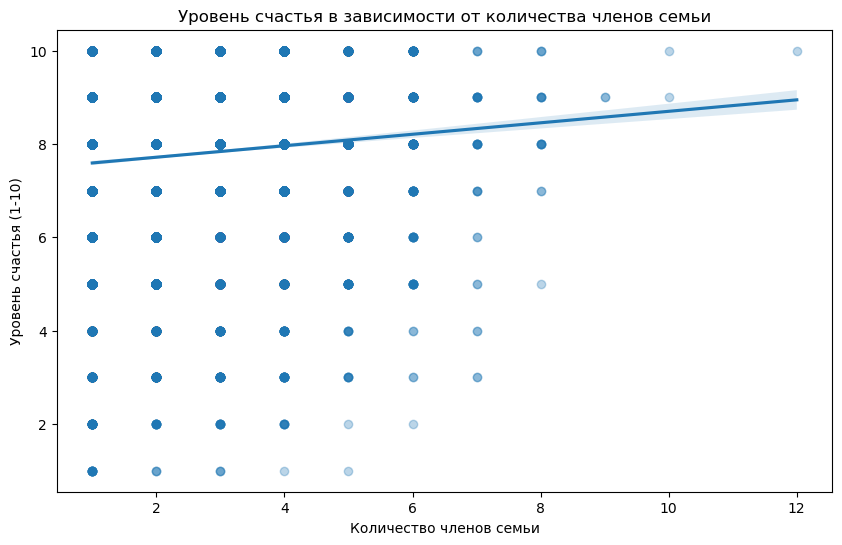


Дополнительная информация:

Корреляционная матрица (Спирмен):
         hincfel  hhmmb  happy
hincfel     1.00  -0.06  -0.26
hhmmb      -0.06   1.00   0.11
happy      -0.26   0.11   1.00


In [25]:
# Гипотеза 1: Чувство дохода семьи влияет на уровень счастья 
def test_income_happiness_hypothesis(df):
    print("Гипотеза 1: Чувство дохода семьи влияет на уровень счастья")
    print("--------------------------------------------------------")
    
    # Описательные статистики
    stats_table = df.groupby('hincfel')['happy'].agg(['mean', 'std', 'count'])
    print("\nОписательные статистики по группам:")
    print(stats_table.round(2))
    
    # Визуализация распределения hincfel
    plt.figure(figsize=(10, 6))
    sns.histplot(df['hincfel'], bins=4, discrete=True)
    plt.title('Распределение ответов по чувству дохода семьи')
    plt.xlabel('Категория дохода (1-4)')
    plt.ylabel('Количество наблюдений')
    plt.show()
    
    # Анализ корреляции (добавлен отсутствующий код)
    corr, p_value = stats.spearmanr(df['hincfel'], df['happy'])
    print(f"\nКорреляция Спирмена: {corr:.3f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Корреляция статистически значима (p < 0.05)")
    else:
        print("Корреляция не статистически значима")
    
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='hincfel', y='happy', data=df)
    plt.title('Уровень счастья по категориям дохода')
    plt.xlabel('Категория дохода (1-комфортно, 4-очень сложно)')
    plt.ylabel('Уровень счастья (1-10)')
    plt.show()
    
    return corr, p_value

# Вызов функций
h1_corr, h1_p = test_income_happiness_hypothesis(clean_data)
h2_corr, h2_p = test_family_size_happiness_hypothesis(clean_data)

# Дополнительная информация (исправленная версия)
print("\nДополнительная информация:")
print("\nКорреляционная матрица (Спирмен):")
print(clean_data[['hincfel', 'hhmmb', 'happy']].corr(method='spearman').round(2))

Выводы:

Корреляция между чувством дохода и счастьем:
    Коэффициент Спирмена: -0.257 (умеренная отрицательная связь)
    Связь статистически значима (p < 0.0001)
    Чем хуже финансовое положение, тем ниже уровень счастья
Корреляция между размером семьи и счастьем:
    Коэффициент Спирмена: 0.105 (слабая положительная связь)
    Связь статистически значима
    Большее количество членов семьи совсем немного связано с повышением уровня счастья